In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
import re

# Adjust the path to point to your project root.
project_root = os.path.abspath('/Users/treycole/Repos/axion-pert')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from modules.qe_read_file import (
    read_w90_band_dat, read_labelinfo, read_bands_gnu, get_symmetry_kpath_labels,
    read_bands_dat_filband, kpath_distance
)

In [2]:
def plot_bands(
        E: np.ndarray,
        kpts: np.ndarray,
        segments: list[int],
        labels: list[str],
        ef: float | None = None,
        ylim: tuple[float, float] | None = None,
        title: str | None = None, outfile: str | None = None):
    """
    Plot bands vs k-point index.

    Parameters
    ----------
    E : (nks, nbnd) array
    ef : float or None
        If given, subtract this Fermi level (eV).
    ylim : (ymin, ymax) or None
    title : str or None
    outfile : str or None
        If provided, save to this path; otherwise just show.
    """
    fig, ax = plt.subplots()

    nks, nbnd = E.shape
    k = kpts
    assert len(k) == nks, "kpts length must match E.shape[0]"
    Y = E if ef is None else (E - ef)

    # Get high-symmetry k-path labels
    xticks, xlabels = get_symmetry_kpath_labels(kpts, segments, labels)

    # Set high-symmetry k-path labels
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    for x in xticks:
        ax.axvline(x, color='gray', lw=0.5, ls='-')

    for j in range(nbnd):
        ax.plot(k, Y[:, j], color='b', lw=0.7)

    # Fermi level
    if ef is not None:
        ax.axhline(0, color='k', lw=0.5, ls='--')
        ax.set_ylabel(r"Energy − $E_F$ (eV)")
    else:
        ax.set_ylabel("Energy (eV)")   

    ax.set_xlabel("k-point index along path")
    ax.set_xlim(k[0], k[-1])

    if ylim: 
        ax.set_ylim(*ylim)

    ax.set_title(title or f"Band structure ({nbnd} bands, {nks} k-points)")
    return fig, ax

In [3]:
E, k_frac, _ = read_bands_dat_filband("MnBi2Te4_bands.dat")

In [4]:
b1 = [ 6.322314, -3.650196,  0.334731 ]  
b2 = [0.000000, 7.300392,  0.334734 ]  
b3 = [-6.322314, -3.650196,  0.334731 ]  

In [5]:
x = kpath_distance(k_frac, np.array(b1), np.array(b2), np.array(b3))

In [6]:
E_F = 7.6740 # eV

(6.674, 8.674)

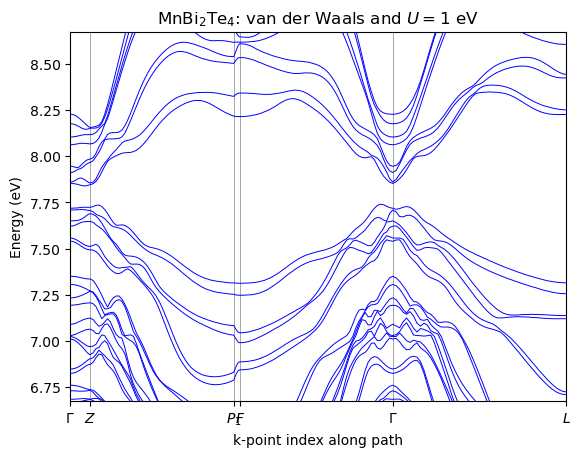

In [9]:
segments = [50, 50, 50, 50, 50, 1]  # Number of points per segment
labels = [r'$\Gamma$', r'$Z$', r'$P_1$', r'$F$', r'$\Gamma$', r'$L$']

title = r'MnBi$_2$Te$_4$: van der Waals and $U = 1$ eV'
fig, ax = plot_bands(E, x, segments, labels, ef=None, title=title)
ax.set_ylim(E_F-1, E_F+1)
# ax.set_ylim(-7, 15)
# ax.set_ylim(2, 10)
